In [1]:
import pandas as pd

In [2]:
original_dataset = pd.read_csv('/Users/irvingestrada/Documents/Maestría/9- Procesamiento y Clasificacion de Datos/Datasets/APPLE_iPhone_SE.csv')

In [3]:
original_dataset

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [4]:
dataset = original_dataset

In [5]:
def sentiment_tag(rating):
    if rating >= 4:
        sentiment = "Positive"
    elif rating == 3:
        sentiment = "Neutral"
    else:
        sentiment = "Negative"
        
    return sentiment

In [6]:
dataset["Real_Sentiment"] = dataset["Ratings"].apply(sentiment_tag)

In [7]:
dataset

,Ratings,Comment,Reviews,Real_Sentiment
0,5,Super!,Great camera for pics and videos Battery life ...,Positive
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,Positive
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",Positive
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,Positive
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,Positive
...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,Positive
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",Positive
9710,5,Awesome,very niceREAD MORE,Positive
9711,5,Super!,Loving it as of now. Good Product .READ MORE,Positive


In [8]:
pd.unique(dataset["Real_Sentiment"])

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [9]:
pd.DataFrame(dataset.Real_Sentiment.value_counts())

,Real_Sentiment
Positive,8505
Negative,673
Neutral,535


In [10]:
import re
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger')

In [12]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

url_pattern = re.compile(r'https?://\S+|www\.\S+')

spell = SpellChecker(distance=2)
wordnet_lemmatizer = WordNetLemmatizer()

In [13]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [14]:
def data_clean(text):
    #Removing READ MORE
    text = text.replace('...READ MORE', '')
    text = text.replace('READ MORE', '')
    
    #Removing Emojis
    text = emoji_pattern.sub(r'', text)
    
    #Removing URL
    text = url_pattern.sub(r'', text)
    
    #Removing puctuations signs and numbers, lower cases
    text = re.sub('[^a-zA-Z]',' ',text).lower()
    
    #SpellChecker
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    text = " ".join(corrected_text)
    
    return text
    
    

In [15]:
def clean2(text):
    #Lemmatizar
    text = lemmatize(text)
    
    #Tokenization
    text =  text.replace('hr', '').replace('th', '').split()
    
    #Removing StopWords
    text = [word for word in text if not word in stopwords.words('english')]
    
    text = " ".join(text)
    return text

In [16]:
dataset["Cleaned_Reviews"] = dataset["Reviews"].apply(data_clean)

In [17]:
dataset["POS_tagged"] = dataset["Cleaned_Reviews"].apply(token_stop_pos)

In [18]:
dataset["Cleaned_Reviews"] = dataset["POS_tagged"].apply(clean2)

In [19]:
dataset

,Ratings,Comment,Reviews,Real_Sentiment,Cleaned_Reviews,POS_tagged
0,5,Super!,Great camera for pics and videos Battery life ...,Positive,great camera pic video battery life good far s...,"[(great, a), (camera, n), (pics, n), (videos, ..."
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,Positive,great device let tell pro superb build quality...,"[(great, a), (device, n), (let, v), (tell, v),..."
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",Positive,love old size e inch type definitely go noing ...,"[(loves, v), (older, a), (size, n), (e, v), (i..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,Positive,iphone se best phone ever get beautifully desi...,"[(iphone, n), (se, n), (best, a), (phone, n), ..."
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,Positive,second iphone iphone long time android user te...,"[(second, a), (iphone, n), (iphone, n), (long,..."
...,...,...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,Positive,absolutely brilliant,"[(absolutely, r), (brilliant, a)]"
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",Positive,superb phone iphone feel se innest pocket frie...,"[(superb, n), (phone, n), (iphone, n), (feel, ..."
9710,5,Awesome,very niceREAD MORE,Positive,nice,"[(nice, a)]"
9711,5,Super!,Loving it as of now. Good Product .READ MORE,Positive,love good product,"[(loving, v), (good, a), (product, n)]"


In [20]:
from textblob import TextBlob

In [21]:
# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [22]:
getPolarity('good')

0.7

In [23]:
dataset['Polarity'] = dataset['Cleaned_Reviews'].apply(getPolarity) 
dataset['Analysis'] = dataset['Polarity'].apply(analysis)
dataset.head()

,Ratings,Comment,Reviews,Real_Sentiment,Cleaned_Reviews,POS_tagged,Polarity,Analysis
0,5,Super!,Great camera for pics and videos Battery life ...,Positive,great camera pic video battery life good far s...,"[(great, a), (camera, n), (pics, n), (videos, ...",0.350000,Positive
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,Positive,great device let tell pro superb build quality...,"[(great, a), (device, n), (let, v), (tell, v),...",0.758333,Positive
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",Positive,love old size e inch type definitely go noing ...,"[(loves, v), (older, a), (size, n), (e, v), (i...",0.400000,Positive
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,Positive,iphone se best phone ever get beautifully desi...,"[(iphone, n), (se, n), (best, a), (phone, n), ...",0.453030,Positive
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,Positive,second iphone iphone long time android user te...,"[(second, a), (iphone, n), (iphone, n), (long,...",0.278571,Positive


In [24]:
tb_counts = dataset.Analysis.value_counts()
tb_counts

Positive    7985
Neutral     1101
Negative     627
Name: Analysis, dtype: int64

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

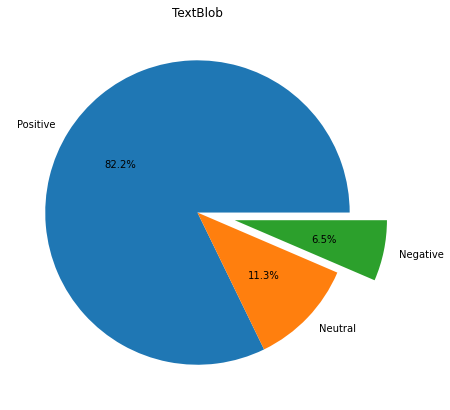

In [26]:
tb_count= dataset.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.title("TextBlob")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

In [27]:
cm = confusion_matrix(dataset['Real_Sentiment'],dataset['Analysis'])

Text(0.5, 15.0, 'Predicted label')

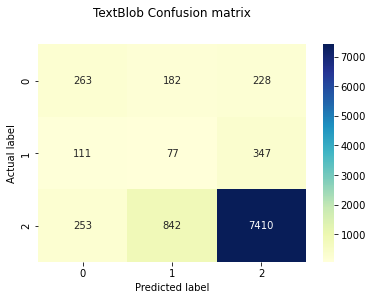

In [28]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('TextBlob Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print(classification_report(dataset['Real_Sentiment'],dataset['Analysis']))
print(accuracy_score(dataset['Real_Sentiment'],dataset['Analysis']))

              precision    recall  f1-score   support

    Negative       0.42      0.39      0.40       673
     Neutral       0.07      0.14      0.09       535
    Positive       0.93      0.87      0.90      8505

    accuracy                           0.80      9713
   macro avg       0.47      0.47      0.47      9713
weighted avg       0.85      0.80      0.82      9713

0.7978997220220323


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [66]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs

#Aqui se modificaron los umbrales
def vader_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# def vader_analysis(compound):
#     if compound >= 0.5:
#         return 'Positive'
#     elif compound <= -0.5 :
#         return 'Negative'
#     else:
#         return 'Neutral'

In [93]:
vadersentimentanalysis('bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad abd bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad abd bad bad bad bad bad bad bad bad bad bad bad bad bad')

{'neg': 0.99, 'neu': 0.01, 'pos': 0.0, 'compound': -0.9996}

In [32]:
dataset['Vader_Sentiment'] = dataset['Cleaned_Reviews'].apply(vadersentimentanalysis)
dataset['Vader_Analysis'] = dataset['Vader_Sentiment'].apply(vader_analysis)

In [33]:
vader_counts = dataset['Vader_Analysis'].value_counts()
vader_counts

Positive    8001
Neutral     1010
Negative     702
Name: Vader_Analysis, dtype: int64

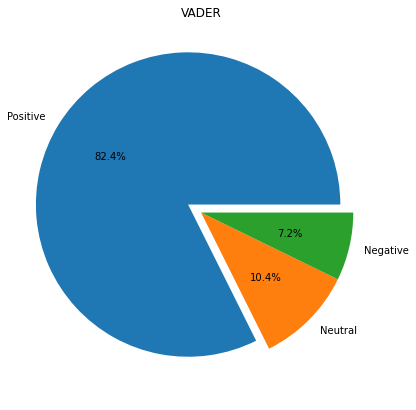

In [34]:
vader_counts= dataset['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.title("VADER")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.show()

In [35]:
cm = confusion_matrix(dataset['Real_Sentiment'],dataset['Vader_Analysis'])

Text(0.5, 15.0, 'Predicted label')

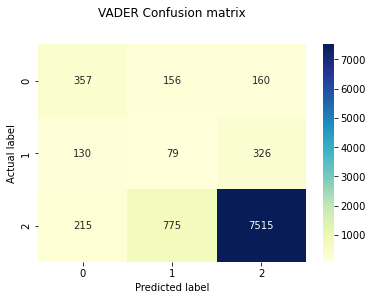

In [36]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('VADER Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print(classification_report(dataset['Real_Sentiment'],dataset['Vader_Analysis']))
print(accuracy_score(dataset['Real_Sentiment'],dataset['Vader_Analysis']))

              precision    recall  f1-score   support

    Negative       0.51      0.53      0.52       673
     Neutral       0.08      0.15      0.10       535
    Positive       0.94      0.88      0.91      8505

    accuracy                           0.82      9713
   macro avg       0.51      0.52      0.51      9713
weighted avg       0.86      0.82      0.84      9713

0.8185936373931844


In [38]:
from nltk.corpus import sentiwordnet as swn

In [39]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        
        if not pos:
            continue
            
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        
#     if not tokens_count:
#         return 0
    if sentiment < 0:
        return 'Negative'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [40]:
dataset['SWN_analysis'] = dataset['POS_tagged'].apply(sentiwordnetanalysis)

In [41]:
swn_counts= dataset['SWN_analysis'].value_counts()
swn_counts

Positive    6898
Neutral     1548
Negative    1267
Name: SWN_analysis, dtype: int64

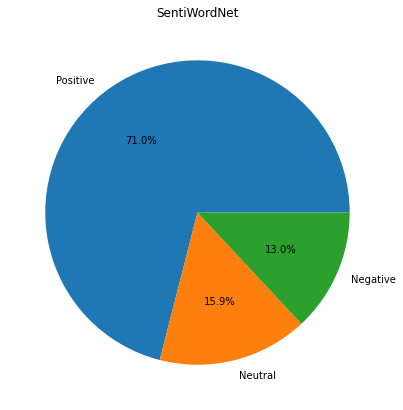

In [42]:
swn_counts= dataset['SWN_analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.title("SentiWordNet")
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
plt.show()

In [43]:
cm = confusion_matrix(dataset['Real_Sentiment'],dataset['SWN_analysis'])

Text(0.5, 15.0, 'Predicted label')

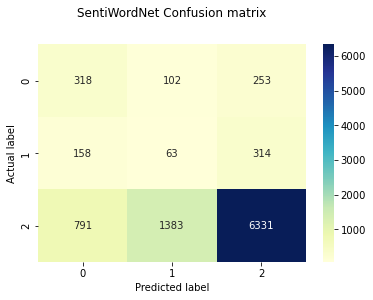

In [44]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('SentiWordNet Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print(classification_report(dataset['Real_Sentiment'],dataset['SWN_analysis']))
print(accuracy_score(dataset['Real_Sentiment'],dataset['SWN_analysis']))

              precision    recall  f1-score   support

    Negative       0.25      0.47      0.33       673
     Neutral       0.04      0.12      0.06       535
    Positive       0.92      0.74      0.82      8505

    accuracy                           0.69      9713
   macro avg       0.40      0.44      0.40      9713
weighted avg       0.82      0.69      0.75      9713

0.6910326366725008


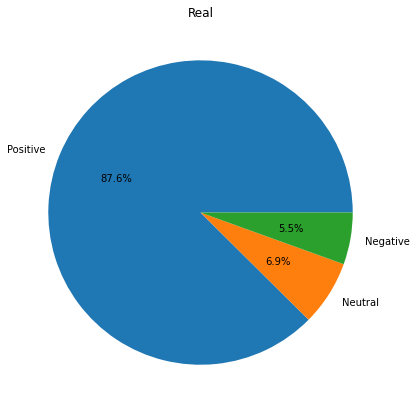

In [46]:

real = dataset.Real_Sentiment.value_counts()
plt.figure(figsize=(10, 7))
plt.title("Real")
plt.pie(real, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
plt.show()

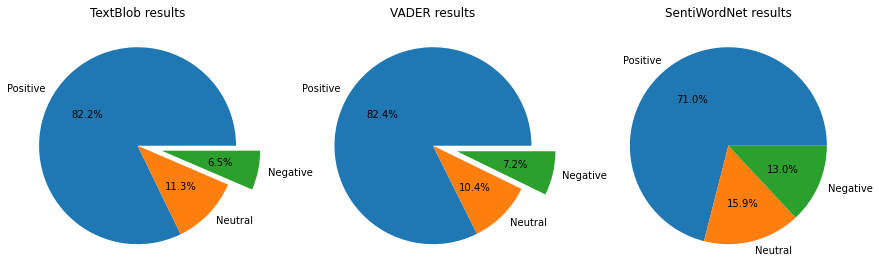

In [47]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)
plt.show()

# Predicción

In [48]:
original_dataset.head()

,Ratings,Comment,Reviews,Real_Sentiment,Cleaned_Reviews,POS_tagged,Polarity,Analysis,Vader_Sentiment,Vader_Analysis,SWN_analysis
0,5,Super!,Great camera for pics and videos Battery life ...,Positive,great camera pic video battery life good far s...,"[(great, a), (camera, n), (pics, n), (videos, ...",0.350000,Positive,0.9485,Positive,Positive
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,Positive,great device let tell pro superb build quality...,"[(great, a), (device, n), (let, v), (tell, v),...",0.758333,Positive,0.9917,Positive,Positive
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",Positive,love old size e inch type definitely go noing ...,"[(loves, v), (older, a), (size, n), (e, v), (i...",0.400000,Positive,0.9217,Positive,Positive
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,Positive,iphone se best phone ever get beautifully desi...,"[(iphone, n), (se, n), (best, a), (phone, n), ...",0.453030,Positive,0.9799,Positive,Positive
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,Positive,second iphone iphone long time android user te...,"[(second, a), (iphone, n), (iphone, n), (long,...",0.278571,Positive,0.8655,Positive,Positive


In [49]:
def target(label):
    if label == 'Positive':
        x = 2
    elif label == 'Negative':
        x = 0
    else:
        x = 1
        
    return x

In [50]:
dataset["Tag"] = dataset["Real_Sentiment"].apply(target)

In [51]:
processed_features = original_dataset['Cleaned_Reviews']
labels = original_dataset['Real_Sentiment']
#labels = dataset['Tag']

In [52]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [54]:
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [55]:
pd.DataFrame(processed_features)

,0,1,2,3,4,5,6,7,8,9,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138207,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.152588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144405,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,0.0,0.0,0.0,0.709438,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9709,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9710,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9711,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [57]:
import numpy as np

In [58]:
np.shape(X_train)[1]

1050

In [59]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [60]:
predictions = text_classifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predictions)

Text(0.5, 15.0, 'Predicted label')

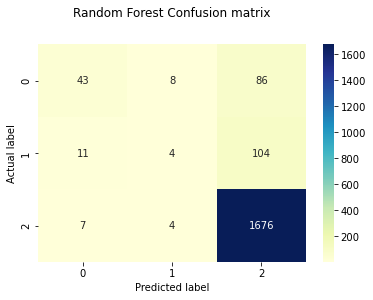

In [64]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.70      0.31      0.43       137
     Neutral       0.25      0.03      0.06       119
    Positive       0.90      0.99      0.94      1687

    accuracy                           0.89      1943
   macro avg       0.62      0.45      0.48      1943
weighted avg       0.84      0.89      0.85      1943

0.8867730313947504
